In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%config InlineBackend.figure_formats = ['pdf']

In [2]:
filename = '4rand.json'
with open(filename) as json_file:
    data = json.load(json_file)
testRuns = pd.io.json.json_normalize(data)
#testRuns = testRuns.loc[testRuns['tripGenRate'] < 0.06]
#testRuns = testRuns.loc[testRuns['tripGenRate'] > 0.00]

In [3]:
grids = 4
df = testRuns
numRoadCells = (16*grids*2*(grids*2+1)*2 + (16*grids*2*grids*2)) * 2
df['averageSpeedWithPassenger'] = df['distWithPassenger'].div(df['stepsWithPassenger']) * 7.5 / 1000 * 60 * 60 
df['averageSpeedWithoutPassenger'] = df['distWithoutPassenger'].div(df['stepsWithoutPassenger'])
df['averageSpeed'] = (df['distWithPassenger'].add(df['distWithoutPassenger'])).div(df['stepsWithoutPassenger'].add(df['stepsWithPassenger'])) * 7.5 / 1000 * 60 * 60 
df['averageStepsWithoutPassenger'] = df['stepsWithoutPassenger'].div(df['numVehicles'])
df['averageStepsTravelingWithoutPassenger'] = df['stepsTravelingWithoutPassenger'].div(df['numVehicles'])
df['densityCell'] = df['numVehicles'].div(numRoadCells)
df['densityKm'] = df['numVehicles'].div(numRoadCells)/7.5*1000
densityLabelsCell = np.around(np.arange(0.1, 0.575, 0.025), 3)
densityBinsCell = np.arange(0.075, 0.575, 0.025)
densityLabelsKm = np.arange(20, 75, 5)
densityBinsKm = np.arange(15, 75, 5)
df['densityBin'] = pd.cut(df['densityKm'], densityBinsKm, labels = densityLabelsKm)
testRuns = df
#32*grids*grids/numRoadCells/7.5*1000

In [4]:
testRunsComp = testRuns.loc[testRuns['step'] == 3600].copy()
#testRunsComp = testRunsComp.loc[testRunsComp['lastTripStep'] >= 3599]
row_indexer = testRunsComp['lanePolicy'] == False
testRunsComp.loc[row_indexer, 'hovMin'] = 0
testRunsComp

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,tripsCompleted,passengerSteps,stepsWithPassenger,stepsWithoutPassenger,...,hovMin,seed,averageSpeedWithPassenger,averageSpeedWithoutPassenger,averageSpeed,averageStepsWithoutPassenger,averageStepsTravelingWithoutPassenger,densityCell,densityKm,densityBin
5,3600,60.0,23425,0,0,0,34430,8976642,7889615,407089,...,1,1602181356064,9.735926,0.666390,10.141047,176.687934,75.402778,0.346154,46.153846,50
11,3600,60.0,23808,9,1078,119,34047,11202766,8048471,248233,...,2,1602181356064,12.670944,0.601713,12.777915,107.740017,45.661024,0.346154,46.153846,50
17,3600,60.0,43823,0,0,0,14032,3589078,7865937,430767,...,0,1602181356064,4.479987,0.521725,4.978763,186.964844,62.069878,0.346154,46.153846,50
23,3600,60.0,28525,2483,2785849,1121,27066,13863203,7949475,347229,...,1,1602181356065,6.597843,0.623228,7.025955,150.707031,61.587674,0.346154,46.153846,50
29,3600,60.0,7598,9098,3044227,334,47993,15835593,8019003,277701,...,2,1602181356065,16.698011,0.615410,16.695268,120.529948,52.266927,0.346154,46.153846,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,3600,60.0,24279,2370,1677630,707,30595,13630217,8029574,267130,...,2,1602181356126,10.705116,0.597451,10.879820,115.941840,48.755208,0.346154,46.153846,50
1133,3600,60.0,51763,0,0,0,3111,494339,7849849,446855,...,0,1602181356126,1.601021,0.470023,2.198299,193.947483,58.132812,0.346154,46.153846,50
1139,3600,60.0,37844,0,0,0,24800,10929554,8079055,217649,...,1,1602181356127,5.875573,0.612027,6.154934,94.465712,38.258681,0.346154,46.153846,50
1145,3600,60.0,11302,7595,2870396,377,51342,16369840,8101867,194837,...,2,1602181356127,17.048450,0.620062,17.041246,84.564670,36.615017,0.346154,46.153846,50


In [5]:
#testRunsComp.loc[testRunsComp.tripsCompleted.idxmax()]

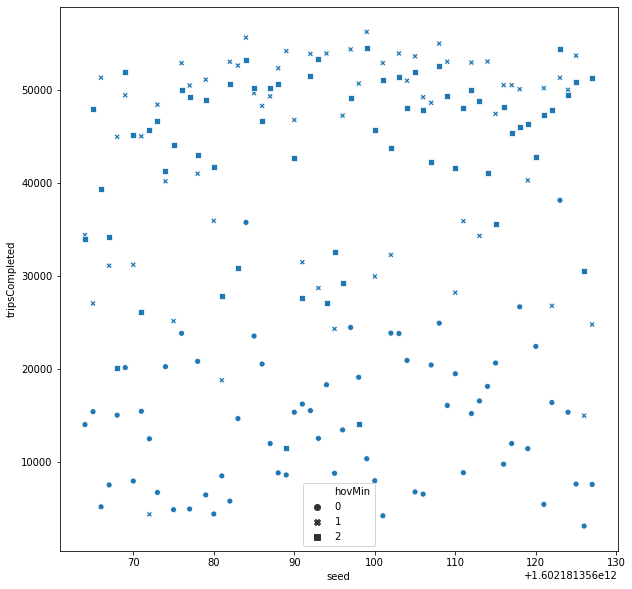

In [6]:
df = testRunsComp
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.scatterplot("seed", "tripsCompleted", data=df, style='hovMin', ax=ax)

In [7]:
tmp = testRunsComp.loc[testRunsComp.groupby(['seed']).tripsCompleted.idxmax().values]
tmp

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,tripsCompleted,passengerSteps,stepsWithPassenger,stepsWithoutPassenger,...,hovMin,seed,averageSpeedWithPassenger,averageSpeedWithoutPassenger,averageSpeed,averageStepsWithoutPassenger,averageStepsTravelingWithoutPassenger,densityCell,densityKm,densityBin
5,3600,60.0,23425,0,0,0,34430,8976642,7889615,407089,...,1,1602181356064,9.735926,0.666390,10.141047,176.687934,75.402778,0.346154,46.153846,50
29,3600,60.0,7598,9098,3044227,334,47993,15835593,8019003,277701,...,2,1602181356065,16.698011,0.615410,16.695268,120.529948,52.266927,0.346154,46.153846,50
41,3600,60.0,4337,9345,2416738,258,51356,15239866,7846812,449892,...,1,1602181356066,13.514225,0.733467,13.855269,195.265625,90.714410,0.346154,46.153846,50
65,3600,60.0,23622,0,0,0,34226,10951026,8090918,205786,...,2,1602181356067,12.107492,0.595599,12.206053,89.316840,37.488715,0.346154,46.153846,50
77,3600,60.0,9371,6363,3042792,478,44993,14772812,7901335,395369,...,1,1602181356068,11.741348,0.695345,12.076496,171.601128,75.744792,0.346154,46.153846,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,3600,60.0,7162,9368,2942371,314,54446,16290646,8069748,226956,...,2,1602181356123,18.149883,0.617789,18.109683,98.505208,42.663628,0.346154,46.153846,50
1085,3600,60.0,7566,8096,2514032,310,50049,16610661,7973835,322869,...,1,1602181356124,11.918576,0.683695,12.173129,140.134115,61.237847,0.346154,46.153846,50
1103,3600,60.0,3613,10438,2761833,264,53726,14643326,7824960,471744,...,1,1602181356125,14.557463,0.737237,14.861542,204.750000,95.611111,0.346154,46.153846,50
1127,3600,60.0,24279,2370,1677630,707,30595,13630217,8029574,267130,...,2,1602181356126,10.705116,0.597451,10.879820,115.941840,48.755208,0.346154,46.153846,50


In [8]:
tmp[tmp.hovMin == 2].tripsCompleted.describe()

count       25.000000
mean     44449.640000
std       6941.746147
min      27861.000000
25%      41746.000000
50%      45706.000000
75%      48893.000000
max      54446.000000
Name: tripsCompleted, dtype: float64

In [9]:
tmp[tmp.hovMin == 1].tripsCompleted.describe()

count       39.000000
mean     50422.871795
std       4973.935079
min      31501.000000
25%      48958.500000
50%      51145.000000
75%      53381.000000
max      56285.000000
Name: tripsCompleted, dtype: float64

In [10]:
testRunsComp2 = testRunsComp[testRunsComp.seed.isin(tmp.loc[tmp.hovMin == 2].seed.values)].copy()
#testRunsComp = testRunsComp[testRunsComp.lastTripStep == 3599]
testRunsComp2

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,tripsCompleted,passengerSteps,stepsWithPassenger,stepsWithoutPassenger,...,hovMin,seed,averageSpeedWithPassenger,averageSpeedWithoutPassenger,averageSpeed,averageStepsWithoutPassenger,averageStepsTravelingWithoutPassenger,densityCell,densityKm,densityBin
23,3600,60.0,28525,2483,2785849,1121,27066,13863203,7949475,347229,...,1,1602181356065,6.597843,0.623228,7.025955,150.707031,61.587674,0.346154,46.153846,50
29,3600,60.0,7598,9098,3044227,334,47993,15835593,8019003,277701,...,2,1602181356065,16.698011,0.615410,16.695268,120.529948,52.266927,0.346154,46.153846,50
35,3600,60.0,40169,0,0,0,15422,4920055,7895906,400798,...,0,1602181356065,4.705083,0.614886,5.279796,173.957465,68.286024,0.346154,46.153846,50
59,3600,60.0,26725,0,0,0,31123,8175073,7964005,332699,...,1,1602181356067,8.817332,0.659419,9.177711,144.400608,61.246094,0.346154,46.153846,50
65,3600,60.0,23622,0,0,0,34226,10951026,8090918,205786,...,2,1602181356067,12.107492,0.595599,12.206053,89.316840,37.488715,0.346154,46.153846,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,3600,60.0,24279,2370,1677630,707,30595,13630217,8029574,267130,...,2,1602181356126,10.705116,0.597451,10.879820,115.941840,48.755208,0.346154,46.153846,50
1133,3600,60.0,51763,0,0,0,3111,494339,7849849,446855,...,0,1602181356126,1.601021,0.470023,2.198299,193.947483,58.132812,0.346154,46.153846,50
1139,3600,60.0,37844,0,0,0,24800,10929554,8079055,217649,...,1,1602181356127,5.875573,0.612027,6.154934,94.465712,38.258681,0.346154,46.153846,50
1145,3600,60.0,11302,7595,2870396,377,51342,16369840,8101867,194837,...,2,1602181356127,17.048450,0.620062,17.041246,84.564670,36.615017,0.346154,46.153846,50


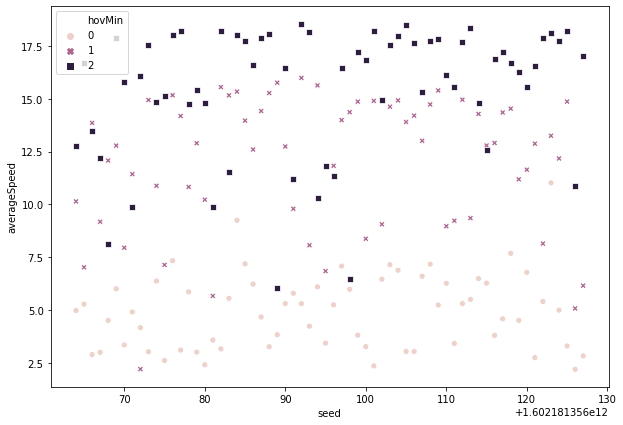

In [22]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot("seed", "averageSpeed", data=testRunsComp, hue='hovMin', style='hovMin', ax=ax)

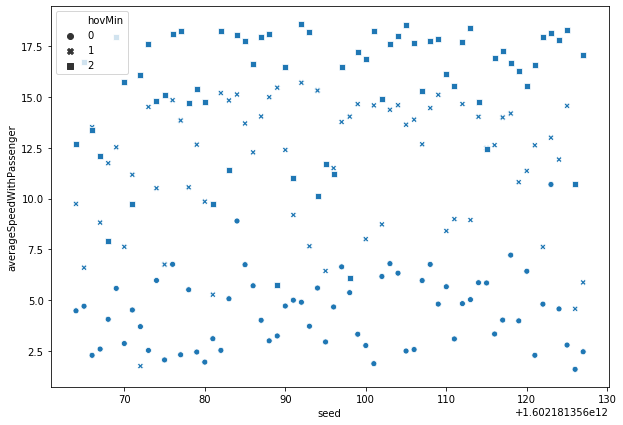

In [19]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot("seed", "averageSpeedWithPassenger", data=testRunsComp, style='hovMin', ax=ax)

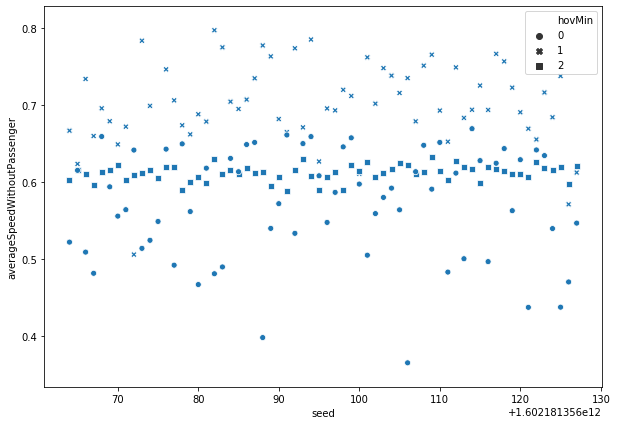

In [20]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot("seed", "averageSpeedWithoutPassenger", data=testRunsComp, style='hovMin', ax=ax)

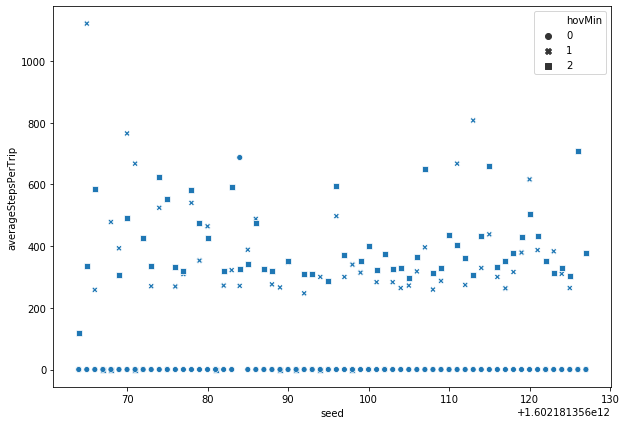

In [21]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot("seed", "averageStepsPerTrip", data=testRunsComp, style='hovMin', ax=ax)